# Sobolev C0 orthonormal basis

In [10]:
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

Let $\Omega=[0,1]$, $x \in \Omega$. 

In [2]:
x = symbols("x")
Omega = (x,0,1)


Let $L = L_2(\Omega)$, $H = H^1(\Omega) = W^{1,2}(\Omega)$ be Hilbert spaces and define the standard $L_2$ inner product by
$$
\langle u, v \rangle = \int_\Omega u v
$$

In [3]:
def inner(u, v, x=symbols("x")):
    return integrate(u * v, Omega)

Define the Boundary operator $B: H \to L$ by $$B u = u(0), \quad \forall u \in H$$

In [4]:
def B(u, x=symbols("x")):
	return u.subs(x, 0)

And the Differential operator $D: H \to L$ by $$D u = \frac{d}{dx} u(x) = u'(x), \quad \forall u \in H$$

In [5]:
def D(u, x=symbols("x")):
	return diff(u, x)

Define the Sobolev inner product by

$$\langle u, v \rangle_{H} = \langle B u, B v \rangle + \langle D u, D v \rangle = [u v]_{t=0} + \int_\Omega u' v'$$

In [6]:
def inner_H(u, v, x=symbols("x")):
	return inner(B(u), B(v)) + inner(D(u), D(v))

We now look for an orthonormal basis $\{ e_k \}$, $e_k \in H$ for the scalar product $\langle \cdot, \cdot \rangle_{H}$ using Gram-Schmidt orthogonalisation

In [ ]:
def gram_schmidt(M):
    E = []
    for u in M:
        e_i = u
        for e_j in E:
            e_i = e_i - inner_H(e_i, e_j) * e_j / inner_H(e_j, e_j)

        e_i = e_i / inner_H(e_i, e_i)

        E.append(e_i)
    return E

using the monomials $M = \{x^k\}$ as generating sequence to generate a polynomial basis.

In [41]:
def monomials(K): return (x ** k for k in range(K))

K = 6
M = monomials(K) # monomial basis
E = gram_schmidt(M)

for e in E: 
    display(e.factor())

We can now plot them

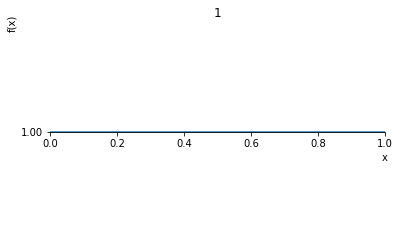

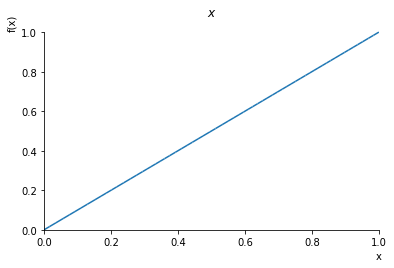

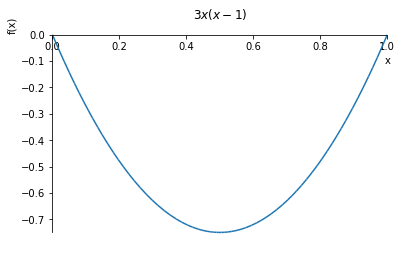

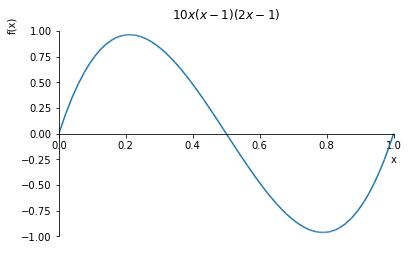

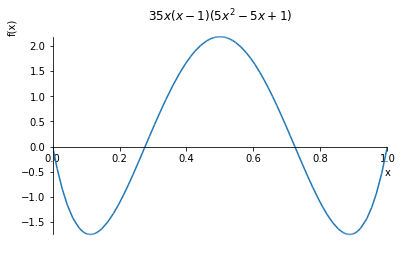

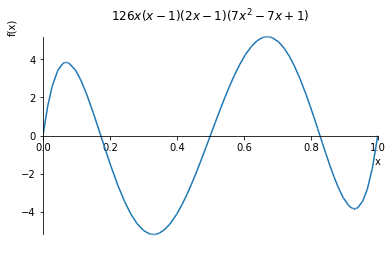

In [31]:
for e in E: 
    plot(e, Omega, title="$%s$" % latex(e))

and their derivative

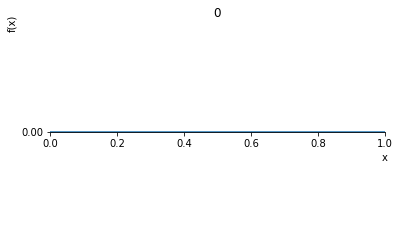

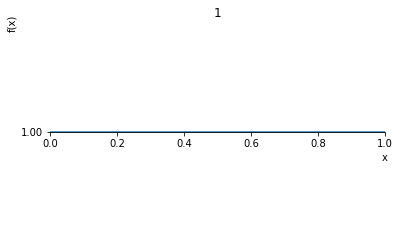

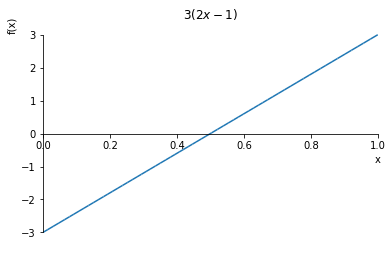

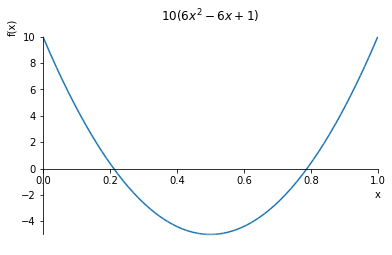

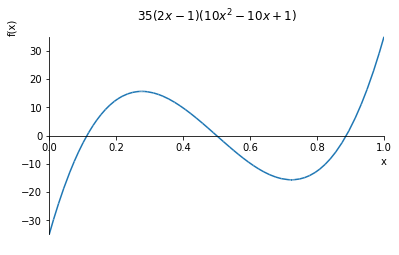

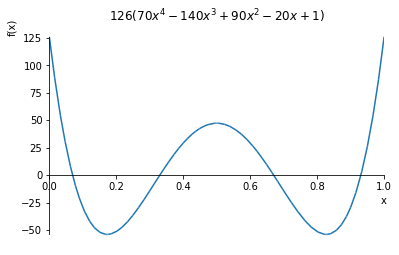

In [38]:
for e in E:
    de = diff(e, x).factor()
    plot(de, Omega, title="$%s$" % latex(de))

# Initial Value problem

Now Fix $n \in \mathbb N$, and let a function $u \in U_n \subset H$
$$
u(t) = \sum_{k=0}^{n-1} e_k(t) u_k = E \mathbf u
$$
and consider the IVP
$$
v' = f(v), \quad v(0) = v_0
$$
with exact solution
$$v(t) = v_0 + \int_0^t f(v(t)) dt, \quad \forall t\in \Omega$$

we want to minimize the functional
$$
F(u) = \frac{1}{2}\Vert u - v \Vert_H^2 = \frac{1}{2} \Vert Du-f(v)\Vert^2 + \frac{1}{2} \Vert Bu-v_0\Vert^2
$$
its first variation $\delta F(u) = 0$ leads to
$$
\begin{cases}
Du = f(v) \\
Bu = v_0
\end{cases}
$$
The projection on $U_n$ leads to 
$$\langle e_i, u \rangle_H = \langle e_i, v \rangle_H$$
which gives
$$
u_i = \langle e_i, v \rangle_H 
$$

Now since $u$ is an approximation of $v$ such that $v(t) = u(t) + \epsilon(t)$ with $\epsilon \in U_n^\perp$ we can show that 
$$P v = P(v_0 + \int_\Omega f(v) = P v_0 + \int_\Omega P f(u + \epsilon) = P v_0 + \int_\Omega P f(u)$$ 
where $P = \operatorname{proj}_{U_n}(\cdot)$ and thus we have reduced the IVP to the algebraic fixed point problem $u = P (v_0 + \int_\Omega f(u))$ with
$$
u_i = \left\langle e_i, v_0 + \int_\Omega f(u) \right\rangle_H = \left\langle B e_i, v_0 \right\rangle + \left\langle D e_i, f(u) \right\rangle
$$
now since $B e_i = 0, \, \forall i>0$ and $D e_0 = 0$ we have
$$
\begin{cases}
 u_0 = v_0\\
 u_i = \left\langle D e_i, f(u) \right\rangle & i > 0
\end{cases}
$$